In [1]:
from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Read in and shuffle dataset
dataset = pd.read_csv("../data_raw/full_data_one_hot.csv").sample(frac=1)

print(dataset.shape)

dataset

(581328, 203)


,departure_delay,time_taxi_out,elapsed_time_scheduled,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft,humidity,dew_point,...,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_VAR,wind_direction_W,wind_direction_WNW,wind_direction_WSW
50738,-4,16,61,0,0,0,0,0,79,69,...,0,0,0,1,0,0,0,0,0,0
195908,13,21,145,0,13,6,0,0,85,25,...,0,0,0,0,0,0,0,0,0,0
462546,43,14,102,0,0,0,0,22,57,57,...,0,0,0,0,0,0,0,0,1,0
49188,92,12,126,92,0,7,0,0,85,75,...,0,0,0,0,0,1,0,0,0,0
318575,-10,13,213,0,0,0,0,0,14,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364474,1,12,283,0,0,0,0,0,39,27,...,0,0,0,0,0,0,0,1,0,0
88432,-4,19,151,0,0,0,0,0,73,63,...,0,0,0,0,0,0,0,0,0,0
483395,43,16,100,0,0,10,0,20,70,51,...,1,0,0,0,0,0,0,0,0,0
207499,-6,22,235,0,0,0,0,0,46,54,...,1,0,0,0,0,0,0,0,0,0


In [3]:
# Get training labels
Y = dataset.head(400000)['time_taxi_out'].values
Y

array([16, 21, 14, ..., 15, 15, 13])

In [4]:
# Get training features
X = dataset.head(400000).drop('time_taxi_out', axis=1).values
X.shape

(400000, 202)

# Deep Learning

In [5]:
# Create and fit model
model = keras.Sequential()

model.add(keras.layers.Dense(100, input_dim = X.shape[1], activation = 'sigmoid'))
model.add(keras.layers.Dense(30, activation = 'sigmoid'))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'relu'))

model.compile(loss = 'mse', optimizer = 'adam', metrics = [keras.metrics.MeanAbsoluteError()])

history = model.fit(X, Y, validation_split = 0.2, epochs = 10, batch_size = 200)

Epoch 1/10
1600/1600 [==============================] - 2s 1ms/step - loss: 211.6716 - mean_absolute_error: 9.7036 - val_loss: 158.6571 - val_mean_absolute_error: 8.3450
Epoch 2/10
1600/1600 [==============================] - 2s 2ms/step - loss: 103.7929 - mean_absolute_error: 6.5229 - val_loss: 81.7991 - val_mean_absolute_error: 6.0273
Epoch 3/10
1600/1600 [==============================] - 2s 2ms/step - loss: 76.1877 - mean_absolute_error: 5.9604 - val_loss: 73.2011 - val_mean_absolute_error: 5.8295
Epoch 4/10
1600/1600 [==============================] - 2s 1ms/step - loss: 71.2044 - mean_absolute_error: 5.8603 - val_loss: 70.4624 - val_mean_absolute_error: 5.7370
Epoch 5/10
1600/1600 [==============================] - 2s 1ms/step - loss: 69.2120 - mean_absolute_error: 5.8076 - val_loss: 68.1306 - val_mean_absolute_error: 5.7780
Epoch 6/10
1600/1600 [==============================] - 2s 1ms/step - loss: 68.3088 - mean_absolute_error: 5.7848 - val_loss: 68.6899 - val_mean_absolute_err

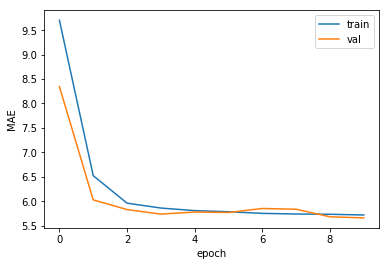

In [6]:
# Plot training/validation loss
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['train', 'val'], loc = 'upper right')
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.show()

In [5]:
# Predict values for unseen data

x_predict = dataset[400000:500000].drop('time_taxi_out', axis=1).values
y_true = dataset[400000:500000]['time_taxi_out'].values

In [8]:
y_predicted = model.predict(x_predict)
print("MAE training: ", mean_absolute_error(Y, model.predict(X)))
print("MAE test: ", mean_absolute_error(y_true, y_predicted))

MAE training:  5.6347700267148015
MAE test:  5.645663092269897


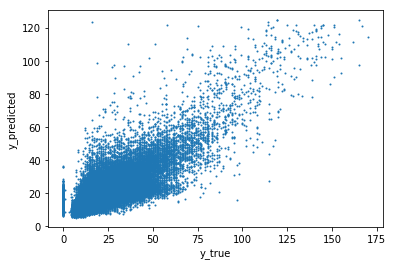

In [9]:
plt.scatter(y_true, y_predicted, s = 1)
plt.xlabel("y_true")
plt.ylabel("y_predicted")
plt.show()

# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [7]:
model = LinearRegression().fit(X, Y)

In [8]:
print("r_sq training: ", model.score(X, Y))
print("r_sq test: ", model.score(x_predict, y_true))

r_sq training:  0.4238081919600284
r_sq test:  0.4140695987558387


In [9]:
y_predicted = model.predict(x_predict)
test_mae = mean_absolute_error(y_true, y_predicted)
print("MAE training: ", mean_absolute_error(Y, model.predict(X)))
print("MAE test: ", test_mae)

MAE training:  6.6418192713803546
MAE test:  6.653655706379016


# Polynomial Regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
x_numeric = X[:, 0:13]
x_one_hot = X[:, 13:]
transformer = PolynomialFeatures(degree = 2, include_bias = True)
transformer.fit(x_numeric)
x_numeric_ = transformer.transform(x_numeric)
X_ = np.concatenate((x_numeric_, x_one_hot), axis = 1)

In [8]:
model = LinearRegression().fit(X_, Y)

In [9]:
x_predict_numeric_ = transformer.transform(x_predict[:, 0:13])
x_predict_ = np.concatenate((x_predict_numeric_, x_predict[:, 13:]), axis = 1)
print("r_sq training: ", model.score(X_, Y))
print("r_sq test: ", model.score(x_predict_, y_true))

r_sq training:  0.4962595935412766
r_sq test:  0.4982515373554338


In [10]:
y_predicted = model.predict(x_predict_)
test_mae = mean_absolute_error(y_true, y_predicted)
print("MAE training: ", mean_absolute_error(Y, model.predict(X_)))
print("MAE test: ", test_mae)

MAE training:  6.276235768111072
MAE test:  6.2347969036412145
